<a href="https://colab.research.google.com/github/MMucahit/PyhtonDeepLearningFrancoisChollet/blob/main/CNN_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resimlerin Okunması ve Depolanması

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1630832676482632467, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5717016417465912432
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
import os, shutil

In [6]:
orginal_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks' ## Veri setinin bulunduğu dizini

In [7]:
base_dir = r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small' ## Küçültülmüş veri setinin dizini
# os.mkdir(base_dir)

In [8]:
train_dir = os.path.join(base_dir, 'train') ## Eğitim setinin dizini
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation') ## Doğrulama setinin dizini 
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test') ## Test setinin dizini
# os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats') ## Kedi eğitim setinin dizini
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') ## Köpek eğitim setinin dizini
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') ## Kedi doğrulama setinin dizini
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') ## Köpek doğrulama setinin dizini
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') ## Kedi test setinin dizini
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') ## Köpek test setinin dizini
# os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)   

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)   

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(orginal_dataset_dir + '/train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Ağın İnşası

In [10]:
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

Veri Önişleme

In [ ]:
## Resim dosyalarını oku.
## JPEG içeriğini kodçözerek RGB görüntüye dönüştür.
## RGB görüntüyü ondalık tensörlere dönüştür.
## RGB görüntüyü (0,1) aralığına ölçekle

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255) ## Tüm resimleri 1/255' le ölçekler
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [17]:
## Bizim örneğimizde yığın büyüklüğü 20 ve 100 yığın alınacak toplamda 2000 veri eder.
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 30,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 16s 120ms/step - loss: 0.8872 - accuracy: 0.4864 - val_loss: 0.6881 - val_accuracy: 0.6140
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6914 - accuracy: 0.5480 - val_loss: 0.6512 - val_accuracy: 0.5810
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6528 - accuracy: 0.6581 - val_loss: 0.6263 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5729 - accuracy: 0.7234 - val_loss: 0.6020 - val_accuracy: 0.6770
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5437 - accuracy: 0.7441 - val_loss: 0.5620 - val_accuracy: 0.7160
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4615 - accuracy: 0.7893 - val_loss: 0.6020 - val_accuracy: 0.7120
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4064 - accuracy: 0.8128 - val_loss: 0.6151 - val_ac

Eğitim kaybı ve başarımı Çizdirme

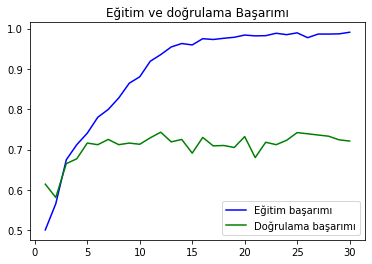

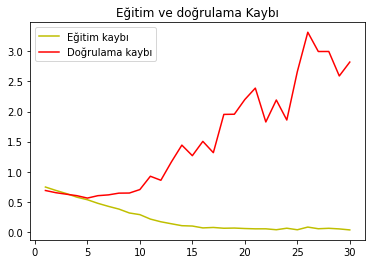

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

plt.show()

In [19]:
## Bu şekiller aşırı uydurma göstergesidir. Eğitim başarımı doğrusal olarak artarak neredeyse %100'e ulaşırken doğrulama %72'de takılıp kalıyor.(5 epok olduğu için gözükmüyor çünkü işlem uzun oldugu için 5 epok denedim.)
## Bu sorundan ağırlık azalımı(L2 regularizasyon) yada iletim sönümü(Dropout) ile başa çıkabiliriz. Ama bilgisayarlı görüde oldukça sık kullanılan bir teknik kullanacağız: Veri seti çeşitlendirme

Veri Seti Çeşitlendirme

In [20]:
## Sonsuz veri olduğunda modeliniz var olan tüm veri dağılımlarını ortaya çıkarabilir ve asla aşırı uydurmaz. Veri çeşitlendirme eldeki verilerden birtakım dönüşümler ile gerçeğe yakın daha fazla eğitim verisi oluşturur. Amaç, eğitim sırasında modelinizin aynı resmi ikinci kez görmemesidir. Bu da modelinizin daha çok örüntü aramasını ve daha iyi genelleştirmesini sağlar.

In [21]:
datagen = ImageDataGenerator(
    rotation_range= 40, ## Derece cinsinden rastgele döndürme açısı
    width_shift_range= 0.2,
## Yatayda dikeyde kaydırma oranı(toplam genişlik ve yüksekliğe oranla)
    height_shift_range= 0.2,
    shear_range= 0.2, ## burkma oranı
    zoom_range= 0.2, ## yakınlaşma oranı
    horizontal_flip= True, ## dikeyde resmi döndürme
    fill_mode= 'nearest' ## işlemlerden sonra ortaya çıkan fazla noktaları doldurma modu
)

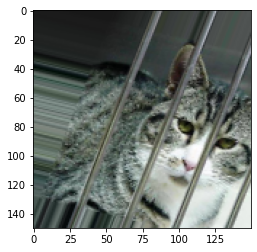

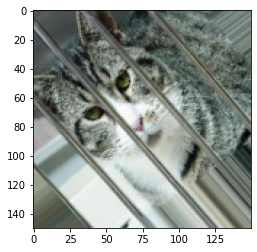

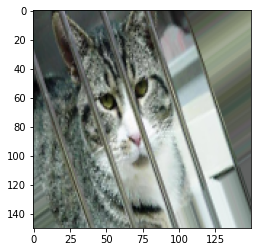

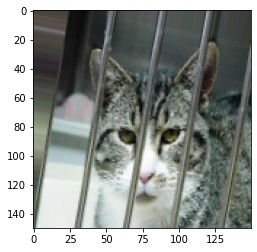

In [22]:
from keras.preprocessing import image ## Görüntü işleme modülü

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size= (150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size= 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()    

Modele İletim Sönümü Eklemek

In [23]:
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras.models import Sequential

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [25]:
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

test_datagen= ImageDataGenerator(rescale= 1./ 255) ## Doğrulama verisi çeşitlendirilmeyecek.

train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
## Bizim örneğimizde yığın büyüklüğü 20 ve 100 yığın alınacak toplamda 2000 veri eder.
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 100,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 0.7862 - accuracy: 0.4978 - val_loss: 0.8510 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 20s 203ms/step - loss: 0.7126 - accuracy: 0.5260 - val_loss: 0.6591 - val_accuracy: 0.6150
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.7086 - accuracy: 0.6045 - val_loss: 0.6660 - val_accuracy: 0.5890
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6640 - accuracy: 0.6002 - val_loss: 0.6306 - val_accuracy: 0.6390
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6623 - accuracy: 0.6128 - val_loss: 0.6807 - val_accuracy: 0.6450
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6472 - accuracy: 0.6560 - val_loss: 0.6058 - val_accuracy: 0.6580
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6225 - accuracy: 0.6605 - val_loss: 0.5859 -

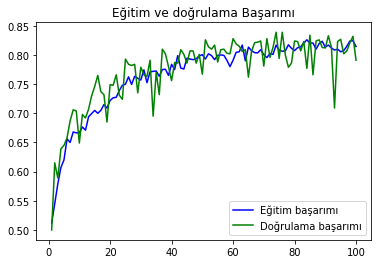

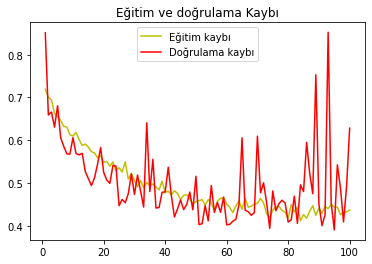

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

VGG16 Evrişim Tabanı Oluşturmak

In [29]:
from keras.applications import VGG16

In [30]:
conv_base = VGG16(weights= 'imagenet', include_top= False, input_shape= (150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

Veri Çeşitlendirme olmadan Hızlı Öznitelik Çıkarma

In [31]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [32]:
base_dir = r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datage = ImageDataGenerator(rescale= 1./255)
batch_size = 20

In [33]:
## Görüntü ve Etiketleri Numpy dizisine dönüştüreceğiz.
##  Conv_base modelinin predict metodu ile nitelik haritasını çıkarağız.
def extract_features(directory, sample_count):
    features = np.zeros(shape= (sample_count, 4, 4, 512)) 
    labels = np.zeros(shape= (sample_count))

    generator = datagen.flow_from_directory(
        directory,
        target_size= (150,150),
        batch_size= batch_size,
        class_mode= 'binary'
    )

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        
        i += 1

        if i * batch_size >= sample_count:
            break

    return features, labels            

In [41]:
## Çıkardığımız özniteliklerin boyutu (samples, 4,4,512)
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
## Tam bağlı modele beslemeden önce (samples, 4*4*512) boyutuna çeviriyoruz.
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Tam Bağlı bir Sınıflandırıcı Tanımlamak

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [53]:
## Düzenlileştirme için Dropout kullandık.
model = Sequential()
model.add(Dense(256, activation= 'relu', input_dim= 4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer= optimizers.RMSprop(lr= 2e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])

history = model.fit(train_features, train_labels, epochs= 30, batch_size= 20, validation_data= (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 7.6034 - accuracy: 0.5832 - val_loss: 1.6620 - val_accuracy: 0.7960
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 3.4192 - accuracy: 0.7517 - val_loss: 1.2542 - val_accuracy: 0.8450
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3565 - accuracy: 0.8000 - val_loss: 1.0348 - val_accuracy: 0.8620
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 1.5923 - accuracy: 0.8465 - val_loss: 0.9714 - val_accuracy: 0.8640
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 1.2554 - accuracy: 0.8726 - val_loss: 0.9131 - val_accuracy: 0.8680
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.8255 - accuracy: 0.8965 - val_loss: 0.9003 - val_accuracy: 0.8760
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.8752 - accuracy: 0.8869 - val_loss: 0.8457 - val_accuracy: 0.8770
Epoch 

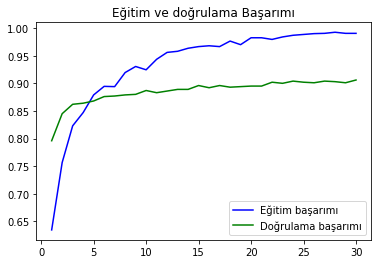

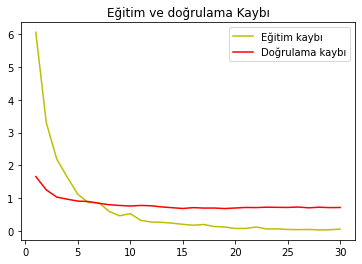

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

In [ ]:
## Veri Çeşitlendirme kullanmadığımız için başarım yüksek olmasına rağmen aşırı uyum var hala

Veri Seti Çeşitlendirmesi ile Öznitelik Çıkarımı